Use the Advanced Optimization benchmark from AC hugging face (https://huggingface.co/spaces/AccelerationConsortium/crabnet-hyperparameter)
- Optimize (minimize) y1
    - If y1 is greater than 0.2, the result is considered "bad" no matter how good the other values are
- Multi-task: 
    - since y1 and y2 are correlated 
    - treat y2 as training task, then y1 as testing task (transfer y2 knowledge to predict y1)

In [4]:
from baybe import Campaign
from baybe.objectives import SingleTargetObjective
from baybe.parameters import NumericalContinuousParameter, CategoricalParameter
from baybe.searchspace import SearchSpace
from baybe.targets import NumericalTarget
from baybe.constraints import ContinuousLinearInequalityConstraint
import numpy as np
import pandas as pd
import torch
from baybe.utils.random import set_random_seed

# we duplicate the Advanced Optimization from AC huggingface for private use, to avoid rate limit
# need to pass your HF token, get your HF token (write access) from https://huggingface.co/settings/tokens

# load the Advanced Optimization from AC huggingface
from my_secret import get_my_hf_token
from gradio_client import Client
client = Client.duplicate("AccelerationConsortium/crabnet-hyperparameter", hf_token=get_my_hf_token())

Using your existing Space: https://hf.space/lyuyizhi/crabnet-hyperparameter 🤗

Loaded as API: https://lyuyizhi-crabnet-hyperparameter.hf.space ✔


In [2]:
# define the function 
def adv_opt(c1, c2, c3, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20):
    result = client.predict(
        x1,  # float (numeric value between 0.0 and 1.0) in 'x1' Slider component
        x2,  # float (numeric value between 0.0 and 1.0) in 'x2' Slider component
        x3,  # float (numeric value between 0.0 and 1.0) in 'x3' Slider component
        x4,  # float (numeric value between 0.0 and 1.0) in 'x4' Slider component
        x5,  # float (numeric value between 0.0 and 1.0) in 'x5' Slider component
        x6,  # float (numeric value between 0.0 and 1.0) in 'x6' Slider component
        x7,  # float (numeric value between 0.0 and 1.0) in 'x7' Slider component
        x8,  # float (numeric value between 0.0 and 1.0) in 'x8' Slider component
        x9,  # float (numeric value between 0.0 and 1.0) in 'x9' Slider component
        x10, # float (numeric value between 0.0 and 1.0) in 'x10' Slider component
        x11, # float (numeric value between 0.0 and 1.0) in 'x11' Slider component
        x12, # float (numeric value between 0.0 and 1.0) in 'x12' Slider component
        x13, # float (numeric value between 0.0 and 1.0) in 'x13' Slider component
        x14, # float (numeric value between 0.0 and 1.0) in 'x14' Slider component
        x15, # float (numeric value between 0.0 and 1.0) in 'x15' Slider component
        x16, # float (numeric value between 0.0 and 1.0) in 'x16' Slider component
        x17, # float (numeric value between 0.0 and 1.0) in 'x17' Slider component
        x18, # float (numeric value between 0.0 and 1.0) in 'x18' Slider component
        x19, # float (numeric value between 0.0 and 1.0) in 'x19' Slider component
        x20, # float (numeric value between 0.0 and 1.0) in 'x20' Slider component
        c1,  # Literal['c1_0', 'c1_1'] in 'c1' Radio component
        c2,  # Literal['c2_0', 'c2_1'] in 'c2' Radio component
        c3,  # Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
        0.5,  # float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
        api_name="/predict",
    )
    return result['data'][0][0]  # return y1 value only

WRAPPED_FUNCTION = adv_opt

In [3]:
# define and create the search space
parameters = [
    NumericalContinuousParameter(name="x1", bounds=(0.0, 1.0)), 
    NumericalContinuousParameter(name="x2", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x3", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x4", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x5", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x6", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x7", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x8", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x9", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x10", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x11", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x12", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x13", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x14", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x15", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x16", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x17", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x18", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x19", bounds=(0.0, 1.0)),
    NumericalContinuousParameter(name="x20", bounds=(0.0, 1.0)),

    CategoricalParameter(name='c1', values=['c1_0', 'c1_1'], encoding="OHE"),
    CategoricalParameter(name='c2', values=['c2_0', 'c2_1'], encoding="OHE"),
    CategoricalParameter(name='c3', values=['c3_0', 'c3_1', 'c3_2'], encoding="OHE"),
]

constraints = [
    ContinuousLinearInequalityConstraint(parameters=["x19", "x20"], coefficients=[-1.0, 1.0], rhs=0.0),
    ContinuousLinearInequalityConstraint(parameters=["x6", "x15"], coefficients=[-1.0, -1.0], rhs=-1.0), 
]

searchspace = SearchSpace.from_product(parameters=parameters, constraints=constraints)

# define objective
objective = SingleTargetObjective(target=NumericalTarget(name="Target", mode="MIN"))

# create campaign
campaign = Campaign(searchspace=searchspace, objective=objective)

In [4]:
from copy import deepcopy
# random_seed_list = [23, 28, 42, 87, 99, 131, 518, 1047, 1598, 2024]
random_seed_list = [2024]
round = 50

results = pd.DataFrame()
for i in range(len(random_seed_list)):
    set_random_seed(random_seed_list[i])

    # copy the campaign
    campaign_i = deepcopy(campaign)

    for k in range(round): 
        recommendation = campaign_i.recommend(batch_size=1)
        # select the numerical columns
        numerical_cols = recommendation.select_dtypes(include='number')
        # replace values less than 1e-8 with 0 in numerical columns
        numerical_cols = numerical_cols.map(lambda x: 0 if x < 1e-6 else x)
        # update the original DataFrame
        recommendation.update(numerical_cols)
        
        # if x6+x15 >1.0, round x6 and x15 to 4 decimal places
        while recommendation['x6'].item() + recommendation['x15'].item() > 1.0: 
            recommendation['x6'] = np.round(recommendation['x6'].item(), 4)
            recommendation['x15'] = np.round(recommendation['x15'].item(), 4)

        # if x19 >= x20, subtract 1e-6 from x19 and add 1e-6 to x20
        while recommendation['x19'].item() >= recommendation['x20'].item():
            recommendation['x19'] = recommendation['x19'].item() - 1e-6
            # if recommendation['x19'] < 0, assign 0 to x19
            if recommendation['x19'].item() < 0:
                recommendation['x19'] = 0
            recommendation['x20'] = recommendation['x20'].item() + 1e-6

        # target value are looked up via the botorch wrapper
        target_values = []
        for index, row in recommendation.iterrows():
            # print(row.to_dict())
            # print(WRAPPED_FUNCTION(**row.to_dict()))
            target_values.append(WRAPPED_FUNCTION(**row.to_dict()))

        recommendation["Target"] = target_values

        campaign_i.add_measurements(recommendation)   
    results = pd.concat([results, campaign_i.measurements])

In [7]:
# save results to csv
results.to_csv('yesterday_BayBE.csv', index=False)

# if seperate to multiple runs, combine the results with the previous results
yesterday = pd.read_csv('yesterday_BayBE.csv')
full_result = pd.concat([yesterday, results])
full_result

,c1,c2,c3,x1,x10,x11,x12,x13,x14,x15,...,x3,x4,x5,x6,x7,x8,x9,Target,BatchNr,FitNr
0,c1_1,c2_0,c3_1,0.955742,0.079700,0.156712,0.440668,0.611786,0.916237,0.910028,...,0.882009,0.713506,0.292401,0.058895,0.901921,0.780197,0.841019,0.474756,1,1.0
1,c1_0,c2_1,c3_0,0.898638,0.245140,0.858544,0.482557,0.830535,0.482080,0.084664,...,0.184576,0.022857,0.179115,0.374760,0.232143,0.222295,0.739905,0.610753,2,2.0
2,c1_1,c2_0,c3_1,0.587615,0.060031,0.488844,0.424079,0.400464,0.849410,0.590170,...,0.741224,0.393405,0.588480,0.359262,0.736663,0.595801,0.742103,0.453337,3,3.0
3,c1_1,c2_0,c3_1,0.799580,0.382116,0.205468,0.370484,0.546231,0.907565,0.455054,...,0.797531,0.579260,0.615410,0.426820,0.779822,0.713497,0.683109,0.341251,4,4.0
4,c1_1,c2_0,c3_1,0.621623,0.895086,0.000000,0.223945,0.371505,1.000000,0.038615,...,0.976214,0.719628,1.000000,0.916917,0.899183,0.894573,0.454450,0.343273,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,c1_1,c2_0,c3_0,0.527051,0.525035,0.597853,0.565134,0.583140,0.776625,0.766613,...,0.782156,0.206119,0.109779,0.233387,0.792775,0.927269,0.469855,0.334462,46,46.0
46,c1_1,c2_0,c3_0,0.526067,0.524307,0.596419,0.565142,0.582281,0.775751,0.767270,...,0.788212,0.214912,0.106252,0.232730,0.793558,0.925460,0.472192,0.351300,47,47.0
47,c1_1,c2_0,c3_0,0.527086,0.524051,0.596858,0.564372,0.583618,0.776362,0.766727,...,0.780929,0.203205,0.108755,0.233273,0.791221,0.927187,0.470168,0.342532,48,48.0
48,c1_1,c2_0,c3_0,0.527163,0.523639,0.596083,0.563978,0.583590,0.776187,0.767051,...,0.781329,0.203338,0.108136,0.232949,0.790817,0.926985,0.470775,0.334343,49,49.0


In [11]:
dff = full_result['Target'].to_numpy().reshape(10, 50)
np.savetxt('AdvOpt-BayBE.csv', dff)

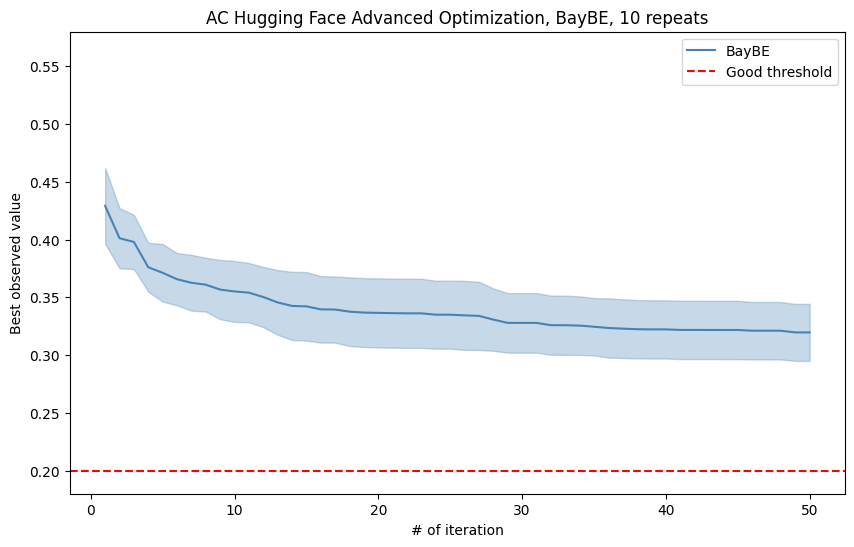

In [15]:
import matplotlib.pyplot as plt
baybe_data = np.loadtxt('AdvOpt-BayBE.csv')
data = [baybe_data] 
means = {}
stds = {}
for m, d in enumerate(data):
    x = d.copy()
    best_obj = np.array([np.minimum.accumulate(obj_i) for obj_i in x])
    means[m] = best_obj.mean(axis=0)
    stds[m] = best_obj.std(axis=0) / np.sqrt(best_obj.shape[0])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
x = np.arange(1, len(means[0]) + 1)
colors = ['steelblue']
methods = ['BayBE']
for i, algo in enumerate(methods):
    ax.plot(x, means[i], label=algo, c=colors[i])
    ax.fill_between(x, means[i] - 2 * stds[i], means[i] + 2 * stds[i], color=colors[i], alpha=0.3)
ax.axhline(y = 0.2, c = 'r', ls = '--', label = "Good threshold")
ax.set_xlabel('# of iteration')
ax.set_ylabel('Best observed value')
ax.set_title('AC Hugging Face Advanced Optimization, BayBE, 10 repeats')
ax.set_ylim(0.18, 0.58)
ax.legend()

### Plot BayBE and Ax together

(0.18, 0.61)

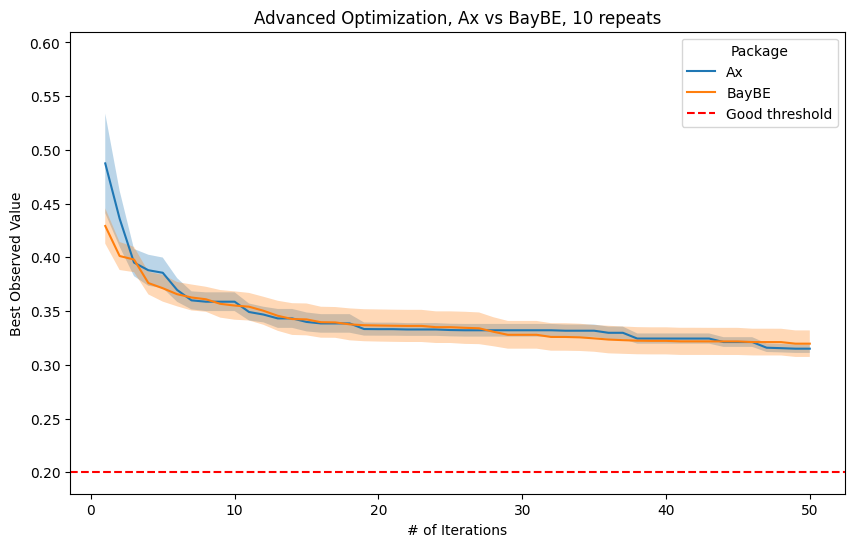

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
ax_data = np.loadtxt('AdvOpt-Ax.csv')
baybe_data = np.loadtxt('AdvOpt-BayBE.csv')

data = [ax_data, baybe_data]
labels = ['Ax', 'BayBE']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i, data in enumerate(data):
    cumulative_min = np.minimum.accumulate(data, axis=1)
    mean = np.mean(cumulative_min, axis=0)
    std = np.std(cumulative_min, axis=0) / np.sqrt(data.shape[0])

    plt.plot(range(1, len(mean) + 1), mean, label=labels[i]) 
    plt.fill_between(range(1, len(mean) + 1), mean - std, mean + std, alpha=0.3)

ax.axhline(y = 0.2, c = 'r', ls = '--', label = "Good threshold")
plt.xlabel('# of Iterations')
plt.ylabel('Best Observed Value')
plt.title('Advanced Optimization, Ax vs BayBE, 10 repeats')
plt.legend(title="Package")
plt.ylim(0.18, 0.61)

### Calling to API and make calculation

In [ ]:
result = client.predict(
		0.222,	# float (numeric value between 0.0 and 1.0) in 'x1' Slider component
		0.5,	# float (numeric value between 0.0 and 1.0)	in 'x2' Slider component
		0.445,	# float (numeric value between 0.0 and 1.0) in 'x3' Slider component
		0.1,	# float (numeric value between 0.0 and 1.0) in 'x4' Slider component
		0.5,	# float (numeric value between 0.0 and 1.0) in 'x5' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x6' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x7' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x8' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x9' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x10' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x11' Slider component
		0,	# float (numeric value between 0.0 and 1.0000000000000002) in 'x12' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x13' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x14' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x15' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x16' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x17' Slider component
		0,	# float (numeric value between 0.0 and 1.0) in 'x18' Slider component
		0,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x19' Slider component
		0,	# float (numeric value between 0.0 and 0.9999999999999998) in 'x20' Slider component
		"c1_0",	# Literal['c1_0', 'c1_1'] in 'c1' Radio component
		"c2_0",	# Literal['c2_0', 'c2_1'] in 'c2' Radio component
		"c3_0",	# Literal['c3_0', 'c3_1', 'c3_2'] in 'c3' Radio component
		1.0,	# float (numeric value between 0.0 and 1.0) in 'fidelity1' Slider component
		api_name="/predict"
)
result

{'headers': ['y1', 'y2', 'y3', 'y4'],
 'data': [[0.615047572549943,
   1.1692076752435276,
   333.7806099566571,
   9993118.024114504]],
 'metadata': None}

In [ ]:
# get y1 only
result['data'][0][0]

0.615047572549943